Load location

In [160]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import datetime

loc = input('Files location: ')
if not loc: loc = '../metadata'

def time_pars(c): return datetime.datetime(int(c[6:10]), int(c[3:5]), int(c[0:2]), int(c[11:13]), int(c[14:16]), int(c[17:19]))
def bool_pars(c): return 1 if c == 'True' else 0
    
data = dict()
    
for file_name in os.listdir(loc):
    if not file_name.endswith('.csv'):
        continue
    with open(os.path.join(loc, file_name), 'r') as file:
        data[file_name[:-4]] = pd.read_csv(file, parse_dates=[0, 1, 2], date_parser=time_pars, index_col=0, 
                                           converters={'Metadata changed': bool_pars, 'Binary changed': bool_pars})

Files location:  


Select resample time delta and plot

Select time period: 


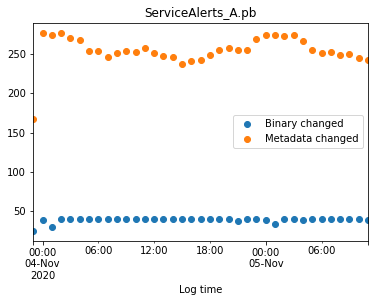

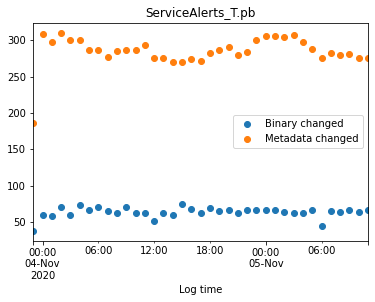

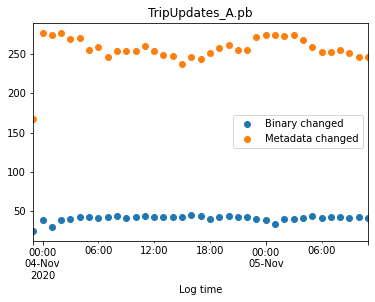

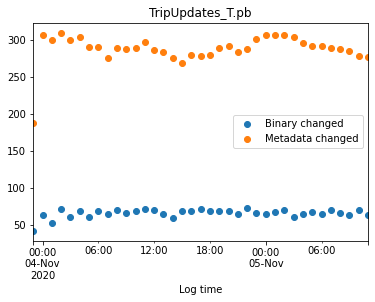

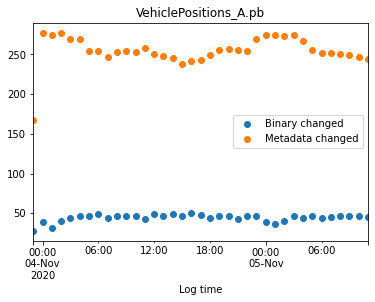

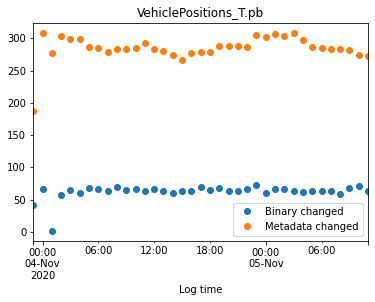

In [184]:
fr = input('Select time period:')
if not fr: fr = '1H'
    
for to_plot in sorted(data.keys()):
    new_plot = data[to_plot]
    if len(new_plot.index) < 5:
        continue
    new_plot = new_plot.filter(items=['Binary changed', 'Metadata changed']).resample(fr).sum()
    new_plot.plot(style='o',title=to_plot).locator_params(integer=True)
new_plot = None

WIP

ServiceAlerts_A.pb                  Quantity
Time                     
0 days 00:00:00         0
0 days 00:00:01         0
0 days 00:00:02         0
0 days 00:00:03         0
0 days 00:00:04         0
...                   ...
0 days 00:13:37         0
0 days 00:13:38         0
0 days 00:13:39         0
0 days 00:13:40         0
0 days 00:13:41         1

[822 rows x 1 columns]
ServiceAlerts_T.pb                  Quantity
Time                     
0 days 00:00:00         0
0 days 00:00:01         0
0 days 00:00:02        57
0 days 00:00:03       189
0 days 00:00:04        38
...                   ...
0 days 00:17:52         0
0 days 00:17:53         0
0 days 00:17:54         0
0 days 00:17:55         0
0 days 00:17:56         1

[1077 rows x 1 columns]
TripUpdates_A.pb                  Quantity
Time                     
0 days 00:00:00         0
0 days 00:00:01         0
0 days 00:00:02         5
0 days 00:00:03        51
0 days 00:00:04        10
...                   ...
0 days 00:13

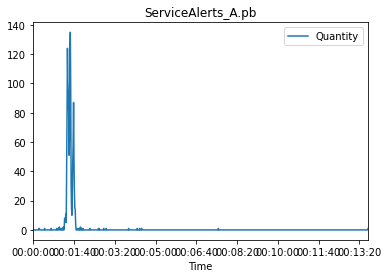

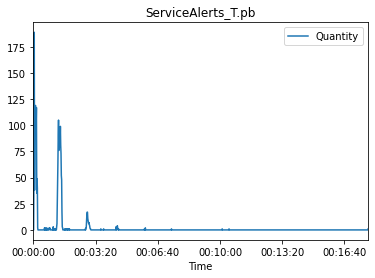

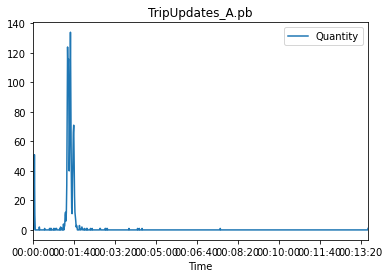

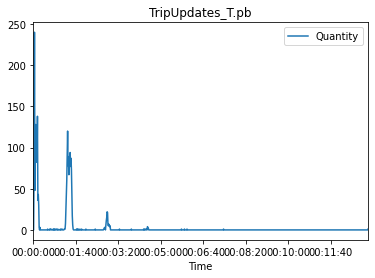

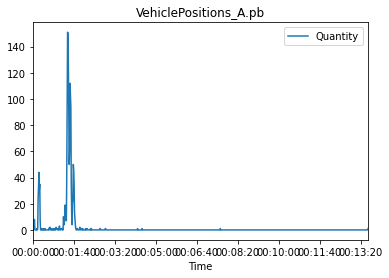

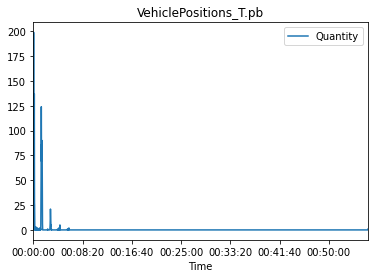

In [189]:
for x in sorted(data.keys()):
    #if x == 'GTFS_KRK_A.zip' or x == 'GTFS_KRK_T.zip': continue
    #print(x)
    new_plot = data[x]
    if len(new_plot.index) < 5:
        continue
    new_plot = new_plot[new_plot['Binary changed'] > 0]
    new_plot = new_plot.filter([])
    new_plot['Time'] = new_plot.index
    new_plot = new_plot.diff()
    new_plot = new_plot.iloc[1:]
    new_plot = new_plot.set_index('Time')
    new_plot.insert(column='Quantity', value=1, loc=0)
    new_plot.loc[np.timedelta64(0)] = 0
    new_plot = new_plot.resample('1S',origin=0).sum()
    print(x,new_plot)
    if len(new_plot.index) > 1:
        new_plot.plot(title=x).locator_params(integer=True,axis='both')
new_plot = None

OLD

In [ ]:
for x in sorted(data.keys()):
    print(x)
    new_plot = data[x]
    new_plot = new_plot.filter(['Create time'])
    new_plot = new_plot.diff()
    print(new_plot[new_plot['Create time'] <= datetime.timedelta(seconds=0)])
    print()
    print()